# ​Task 2: Lasso Regularization
- ​Use the Boston Housing dataset (or any dataset with numerical predictors)
- Apply Lasso Regression and tune the regularization parameter \lambda using cross-validation.
- ​Identify which features get reduced to zero.
- Apply Ridge Regression to the same dataset.
- Compare the coefficients with those from Lasso and Linear Regression.
- Discuss how Ridge helps in reducing overfitting.
- Plot the change in coefficients as \lambda increases for both Lasso and Ridge Regression.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV



In [2]:
# Import the dataset using fetch_openml
from sklearn.datasets import fetch_openml
b_open = fetch_openml(name="boston", version=1, as_frame=True)
df = b_open.frame.copy()
print("Shape:", df.shape)
df.head()

Shape: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
# Apply Lasso Regression
X = df.drop('MEDV', axis=1)
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso
lasso = Lasso(alpha=1.0, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Predictions
y_pred_lasso = lasso.predict(X_test_scaled)

# Evaluate
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print("Lasso Regression:")
print(f"R²: {r2_lasso}")
print(f"RMSE: {rmse_lasso}")

Lasso Regression:
R²: 0.6239428734251422
RMSE: 5.2514466365121475


In [ ]:
# Tune the regularization parameter using cross-validation


lasso_cv = LassoCV(alphas=np.logspace(-3, 2, 100), cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

best_alpha = lasso_cv.alpha_
print(f"Selected alpha Lasso: {best_alpha}")
 
y_pred_lasso_cv = lasso_cv.predict(X_test_scaled)
r2_lasso_cv = r2_score(y_test, y_pred_lasso_cv)
rmse_lasso_cv = np.sqrt(mean_squared_error(y_test, y_pred_lasso_cv))

print(f"Updated Lasso R²: {r2_lasso_cv}")
print(f"Updated Lasso RMSE: {rmse_lasso_cv}")


Best alpha for Lasso: 0.001
Tuned Lasso R²: 0.6687128230636585
Tuned Lasso RMSE: 4.928949380673858


In [12]:
#  Identify which features get reduced to zero
lasso_coefs = pd.Series(lasso_cv.coef_, index=X.columns)
zero_features = lasso_coefs[lasso_coefs == 0].index.tolist()

print("Features reduced to zero coefficients:")
print(zero_features if zero_features else "None")

print("\nAll Lasso Coefficients:")
print(lasso_coefs)


Features reduced to zero coefficients:
None

All Lasso Coefficients:
CRIM      -0.999359
ZN         0.691300
INDUS      0.268936
CHAS       0.718880
NOX       -2.016029
RM         3.145868
AGE       -0.173778
DIS       -3.074913
RAD        2.233347
TAX       -1.748999
PTRATIO   -2.035900
B          1.128372
LSTAT     -3.611403
dtype: float64


In [14]:
Ridge = Ridge(alpha=1.0, random_state=42)
Ridge.fit(X_train_scaled, y_train)
# Predictions
y_pred_Ridge = Ridge.predict(X_test_scaled)

# Evaluate
r2_Ridge = r2_score(y_test, y_pred_Ridge)
rmse_Ridge = np.sqrt(mean_squared_error(y_test, y_pred_Ridge))

print("Ridge Regression:")
print(f"R²: {r2_Ridge}")
print(f"RMSE: {rmse_Ridge}")

Ridge Regression:
R²: 0.6684624359643558
RMSE: 4.930811680696356


In [16]:
# Ridge with cross-validation for alpha tuning
ridge_cv = RidgeCV(alphas=np.logspace(-5, 5, 100), cv=5)
ridge_cv.fit(X_train_scaled, y_train)

best_alpha_ridge = ridge_cv.alpha_
print(f"Best alpha (λ) for Ridge: {best_alpha_ridge:.4f}")

# Predictions
y_pred_ridge = ridge_cv.predict(X_test_scaled)

r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("Ridge Regression:")
print(f"R²: {r2_ridge:.4f}")
print(f"RMSE: {rmse_ridge:.4f}")


Best alpha (λ) for Ridge: 2.8480
Ridge Regression:
R²: 0.6679
RMSE: 4.9349


In [18]:
# * Compare coefficients with Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

coefs_df = pd.DataFrame({
    'Feature': X.columns,
    'Linear': lr.coef_,
    'Lasso': lasso_cv.coef_,
    'Ridge': ridge_cv.coef_
}).set_index('Feature')

print("Coefficient comparison:")
print(coefs_df)


Coefficient comparison:
           Linear     Lasso     Ridge
Feature                              
CRIM    -1.002135 -0.999359 -0.975120
ZN       0.696269  0.691300  0.646382
INDUS    0.278065  0.268936  0.208978
CHAS     0.718738  0.718880  0.728718
NOX     -2.022319 -2.016029 -1.935411
RM       3.145240  3.145868  3.161767
AGE     -0.176048 -0.173778 -0.179137
DIS     -3.081908 -3.074913 -2.979685
RAD      2.251407  2.233347  2.042497
TAX     -1.767014 -1.748999 -1.577864
PTRATIO -2.037752 -2.035900 -2.010348
B        1.129568  1.128372  1.122862
LSTAT   -3.611658 -3.611403 -3.576326


Linear Regression:
Train R2: 0.7508856358979673
Test R2 : 0.668759493535632

Ridge Regression:
Train R2: 0.7507720395034286
Test R2 : 0.66791637894892


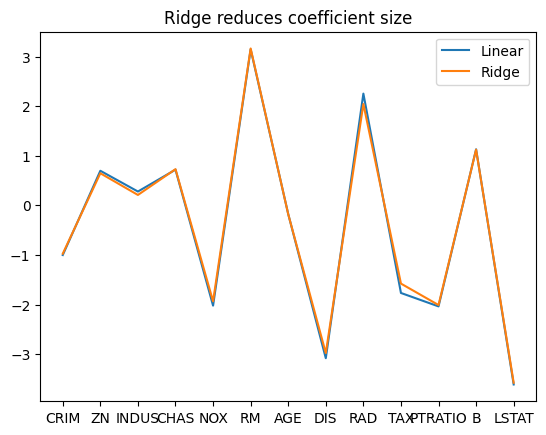

In [22]:
# * Ridge helps to reduce overfitting

# R2 scores for Linear and Ridge
print("Linear Regression:")
print("Train R2:", lr.score(X_train_scaled, y_train))
print("Test R2 :", lr.score(X_test_scaled, y_test))

print("\nRidge Regression:")
print("Train R2:", ridge_cv.score(X_train_scaled, y_train))
print("Test R2 :", ridge_cv.score(X_test_scaled, y_test))

# Plot coefficients
plt.plot(coefs_df['Linear'], label='Linear')
plt.plot(coefs_df['Ridge'], label='Ridge')
plt.title('Ridge reduces coefficient size')
plt.legend()
plt.show()


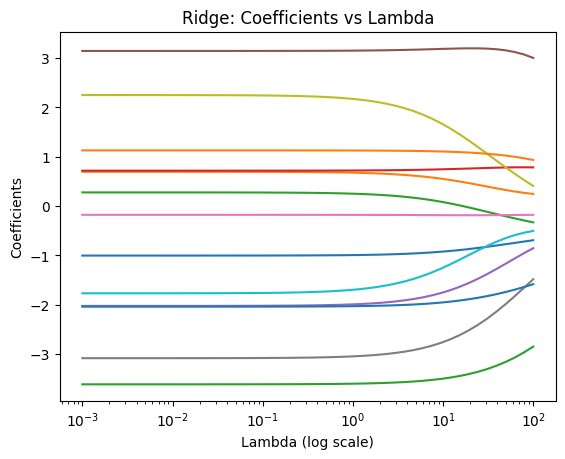

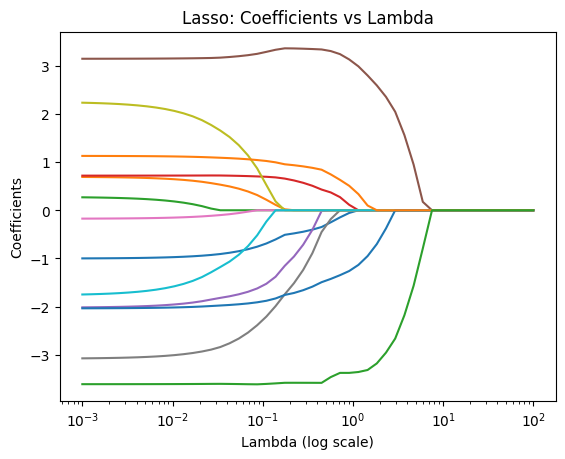

In [23]:
# * How coefficients change as lambda increases

alphas = np.logspace(-3, 2, 50)  # range of lambda values
lasso_coefs = []
ridge_coefs = []

for a in alphas:
    lasso = Lasso(alpha=a, max_iter=10000)
    ridge = Ridge(alpha=a)
    lasso.fit(X_train_scaled, y_train)
    ridge.fit(X_train_scaled, y_train)
    lasso_coefs.append(lasso.coef_)
    ridge_coefs.append(ridge.coef_)

# Convert to array
lasso_coefs = np.array(lasso_coefs)
ridge_coefs = np.array(ridge_coefs)

# Plot Ridge
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.title("Ridge: Coefficients vs Lambda")
plt.xlabel("Lambda (log scale)")
plt.ylabel("Coefficients")
plt.show()

# Plot Lasso
plt.plot(alphas, lasso_coefs)
plt.xscale('log')
plt.title("Lasso: Coefficients vs Lambda")
plt.xlabel("Lambda (log scale)")
plt.ylabel("Coefficients")
plt.show()


# Observation

- The coefficients from Linear, Lasso, and Ridge are quite similar, which means regularization didn’t change them drastically this shows the dataset is fairly well-behaved and not heavily overfitted.

- Ridge coefficients are slightly smaller in magnitude (closer to zero) compared to Linear, this is expected because Ridge shrinks coefficients to reduce model variance.

- Lasso also slightly reduces some coefficients but doesn’t make any feature exactly zero, meaning all features still contribute.

        From the R² scores:

        Linear Regression: Train = 0.75, Test = 0.67

        Ridge Regression: Train = 0.75, Test = 0.67
        Both have nearly equal accuracy, showing Ridge helps control overfitting without reducing performance.

Overall, Ridge performs slightly more stably on test data and provides smoother coefficients — a small improvement in generalization.